## Engineer the most optimal prompts and json skeletons using gpt-4

### HEA intial engineered prompt

In [ ]:
# create initial prompt for HEAs

hea_prompt1 = "Below is a detailed excerpt or the full content from a research paper focused on high entropy alloys (HEAs). You are tasked with parsing the text to extract vital information that describes the materials' composition, synthesis methods, mechanical properties, thermal properties, phase structures, and any special conditions under which measurements were taken. Fill out the provided JSON schema with the appropriate information, ensuring that you capture data for composition names, property types, values, units, synthesis methods, and measurement conditions. Ensure the JSON keys match the provided schema, and populate the values accordingly based on the information extracted from the paper."

"Here's a JSON schema skeleton that you can use to format the extracted information. This schema is designed to capture a broad range of data relevant to HEAs:"

{
  "paper_title": "",
  "authors": [],
  "HEA_Compositions": [],
  "Synthesis_Methods": [],
  "Properties": [
    {
      "type": "",
      "value": "",
      "unit": "",
      "condition": ""
    }
  ],
  "Phase_Structures": [],
  "Measurement_Conditions": {
    "Temperature": "",
    "Pressure": "",
    "Environment": ""
  },
  "Special_Notes": "",
}


### HEA second iteration of prompt engineering

In [ ]:
hea_prompt2 = "Below is the full text or selected sections from a research paper focusing on High Entropy Alloys (HEAs). Your task is to extract critical information relevant to the study of HEAs, including details about material compositions, synthesis methods, mechanical and thermal properties, experimental conditions, and any key findings or conclusions. Use the information to fill out the provided JSON schema, ensuring to capture specific data on the alloy compositions, properties (with units and conditions), synthesis techniques, phase structures, and any notable experimental setups or observations. Pay close attention to any numerical data and contextual details that provide insights into the material's performance and characteristics."

{
  "paper_title": "",
  "authors": [],
  "publication_date": "",
  "HEA_Compositions": [],
  "Synthesis_Methods": [],
  "Properties": [
    {
      "name": "",
      "value": "",
      "unit": "",
      "conditions": ""
    }
  ],
  "Phase_Structures": [],
  "Experimental_Conditions": [
    {
      "condition_type": "",
      "description": ""
    }
  ],
  "Key_Findings": [],
  "References": [],
  "Special_Notes": ""
}


### HEA third iteration of prompt engineering

In [ ]:
hea_prompt3 = "Below is an excerpt from a scientific paper discussing High-Entropy Alloys (HEAs). As a research assistant specializing in materials science, you are tasked with extracting crucial material characteristics and experimental conditions. Your goal is to organize the extracted data into a structured JSON format. Please focus on the composition of the alloys, phase structures, properties measured, conditions under which these properties were measured, and any treatment processes applied."

{
  "composition": [
    {
      "element": "",
      "percentage": ""
    }
  ],
  "phase_structure": "",
  "properties_measured": [
    {
      "property": "",
      "value": "",
      "unit": ""
    }
  ],
  "measurement_conditions": "",
  "treatment": ""
}


### Perovskite intial engineered prompt

In [ ]:
pervskite_1 = "Below is an excerpt or the full content from a research paper focused on perovskites. You are tasked with parsing the text to extract essential information that describes the materials' composition, synthesis methods, optical properties, band gaps, stability under various conditions, and any special considerations for experimental setups. Fill out the provided JSON schema with appropriate information, ensuring that you capture data for composition names, property types, values, units, synthesis methods, and measurement conditions. Ensure the JSON keys match the provided schema, and populate the values accordingly based on the information extracted from the paper."

{
  "paper_title": "",
  "authors": [],
  "Perovskite_Compositions": [],
  "Synthesis_Methods": [],
  "Optical_Properties": [
    {
      "type": "",
      "value": "",
      "unit": "",
      "condition": ""
    }
  ],
  "Band_Gaps": [
    {
      "value": "",
      "unit": "",
      "condition": ""
    }
  ],
  "Stability_Conditions": [],
  "Experimental_Setup": [],
  "Special_Notes": ""
}


### Perovskite second iteration of prompt engineering

In [ ]:
pervskite_2 = "Below is a detailed excerpt or the full content from a research paper focused on perovskite materials. You are tasked with parsing the text to extract vital information that describes the materials' composition, synthesis methods, mechanical properties, electronic properties like band gaps, computational methods including machine learning models used, and any special conditions under which measurements were taken. Fill out the provided JSON schema with the appropriate information, ensuring that you capture data for composition names, property types, values, units, synthesis methods, computational methods, and measurement conditions. Ensure the JSON keys match the provided schema, and populate the values accordingly based on the information extracted from the paper."

{
  "paper_title": "",
  "authors": [],
  "perovskite_Compositions": [],
  "Synthesis_Methods": [],
  "Properties": [
    {
      "type": "",
      "value": "",
      "unit": "",
      "condition": ""
    }
  ],
  "Computational_Methods": {
    "Machine_Learning_Models": [],
    "DFT_Calculations": []
  },
  "Phase_Structures": [],
  "Measurement_Conditions": {
    "Temperature": "",
    "Pressure": "",
    "Environment": ""
  },
  "Special_Notes": "",
  "References": []
}


### Perovskite third iteration of prompt engineering

In [1]:
pervskite_3 = "Below is content from a perovskite research paper. You are tasked to extract essential information that includes the materials' composition, synthetic approaches, properties relevant to perovskite application, and specific conditions under which experiments were conducted. Please fill out the provided JSON schema with detailed information including the title of the paper, author details, perovskite composition, synthetic methods, and a comprehensive list of properties along with their measurement conditions."

{
  "paper_title": "",
  "authors": [],
  "perovskite_composition": "",
  "synthetic_methods": [],
  "properties": [
    {
      "type": "",
      "value": "",
      "unit": "",
      "measurement_condition": ""
    }
  ],
  "experimental_conditions": {
    "temperature": "",
    "pressure": "",
    "atmosphere": ""
  },
  "additional_notes": "",
  "references": []
}


## Extract data from pdf into machine readable format

In [15]:
import os
import nougat
import torch
from PIL import Image
from IPython.display import display
# torch.cuda.empty_cache()
# os.getcwd()

### process papers with nouget

In [3]:
pdf_path = '../papers/HEA_2.pdf'
output_directory = '../processed_papers'

# !nougat $pdf_path -o $output_directory

In [ ]:
# output_file = f'{output_directory}/output_file_name.mmd'  # Adjust based on actual output filename

# with open(output_file, 'r') as file:
#     content = file.read()

# # Process the content as needed
# print(content)


In [4]:
from transformers import AutoProcessor, VisionEncoderDecoderModel
import torch

In [5]:
# Load the Nougat model and processor from the hub
processor = AutoProcessor.from_pretrained("facebook/nougat-small")
model = VisionEncoderDecoderModel.from_pretrained("facebook/nougat-small")

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

from typing import Optional, List
import io
import fitz
from pathlib import Path

def rasterize_paper(
    pdf: Path,
    outpath: Optional[Path] = None,
    dpi: int = 96,
    return_pil=False,
    pages=None,
) -> Optional[List[io.BytesIO]]:
    """
    Rasterize a PDF file to PNG images.

    Args:
        pdf (Path): The path to the PDF file.
        outpath (Optional[Path], optional): The output directory. If None, the PIL images will be returned instead. Defaults to None.
        dpi (int, optional): The output DPI. Defaults to 96.
        return_pil (bool, optional): Whether to return the PIL images instead of writing them to disk. Defaults to False.
        pages (Optional[List[int]], optional): The pages to rasterize. If None, all pages will be rasterized. Defaults to None.

    Returns:
        Optional[List[io.BytesIO]]: The PIL images if `return_pil` is True, otherwise None.
    """

    pillow_images = []
    if outpath is None:
        return_pil = True
    try:
        if isinstance(pdf, (str, Path)):
            pdf = fitz.open(pdf)
        if pages is None:
            pages = range(len(pdf))
        for i in pages:
            page_bytes: bytes = pdf[i].get_pixmap(dpi=dpi).pil_tobytes(format="PNG")
            if return_pil:
                pillow_images.append(io.BytesIO(page_bytes))
            else:
                with (outpath / ("%02d.png" % (i + 1))).open("wb") as f:
                    f.write(page_bytes)
    except Exception:
        pass
    if return_pil:
        return pillow_images

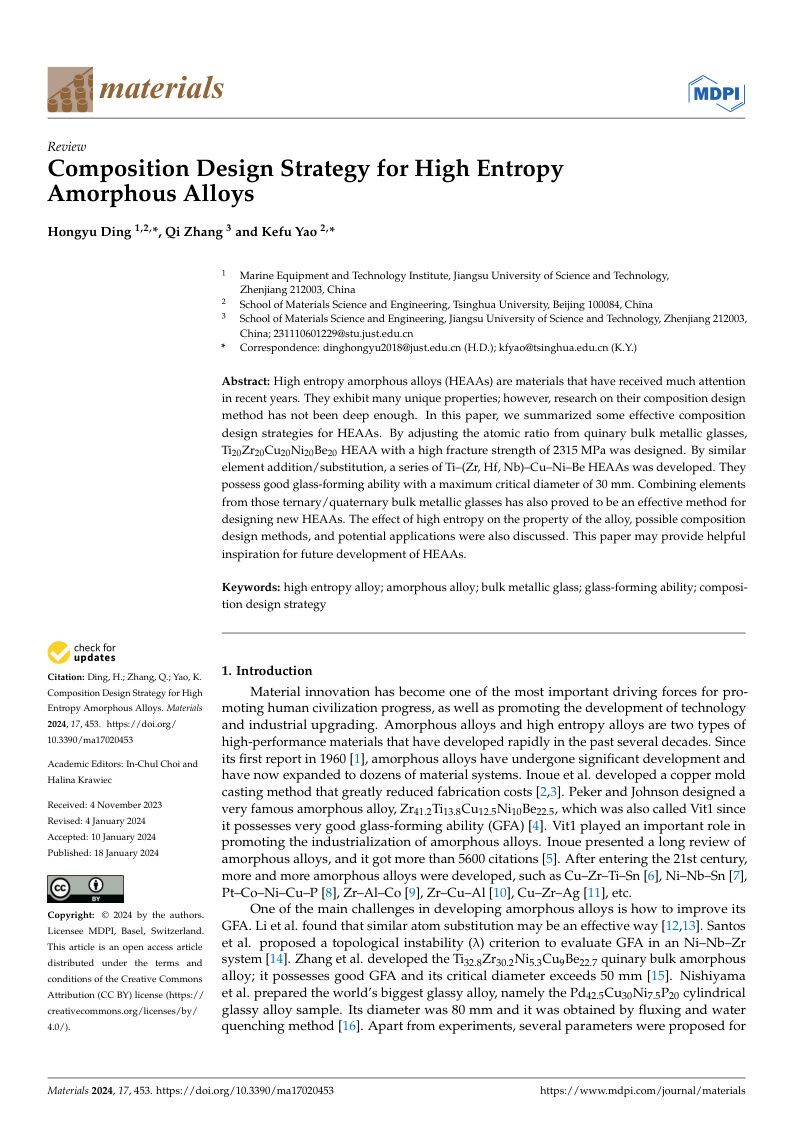

In [22]:
from huggingface_hub import hf_hub_download
from typing import Optional, List
import io
import fitz
from pathlib import Path
from PIL import Image


filepath = '../papers/HEA_2.pdf'

images = rasterize_paper(pdf=filepath, return_pil=True)
#print out all images   
# for i, image in enumerate(images):
#     display(Image.open(image))
#store all pages in 
image = Image.open(images[0])
image

for i, image in enumerate(images):
    image.save(f'../papers/HEA_2_{i}.png')

In [25]:
pixel_values = processor(images=image, return_tensors="pt").pixel_values
pixel_values.shape

torch.Size([1, 3, 896, 672])

In [26]:
from transformers import StoppingCriteria, StoppingCriteriaList
from collections import defaultdict

class RunningVarTorch:
    def __init__(self, L=15, norm=False):
        self.values = None
        self.L = L
        self.norm = norm

    def push(self, x: torch.Tensor):
        assert x.dim() == 1
        if self.values is None:
            self.values = x[:, None]
        elif self.values.shape[1] < self.L:
            self.values = torch.cat((self.values, x[:, None]), 1)
        else:
            self.values = torch.cat((self.values[:, 1:], x[:, None]), 1)

    def variance(self):
        if self.values is None:
            return
        if self.norm:
            return torch.var(self.values, 1) / self.values.shape[1]
        else:
            return torch.var(self.values, 1)


class StoppingCriteriaScores(StoppingCriteria):
    def __init__(self, threshold: float = 0.015, window_size: int = 200):
        super().__init__()
        self.threshold = threshold
        self.vars = RunningVarTorch(norm=True)
        self.varvars = RunningVarTorch(L=window_size)
        self.stop_inds = defaultdict(int)
        self.stopped = defaultdict(bool)
        self.size = 0
        self.window_size = window_size

    @torch.no_grad()
    def __call__(self, input_ids: torch.LongTensor, scores: torch.FloatTensor):
        last_scores = scores[-1]
        self.vars.push(last_scores.max(1)[0].float().cpu())
        self.varvars.push(self.vars.variance())
        self.size += 1
        if self.size < self.window_size:
            return False

        varvar = self.varvars.variance()
        for b in range(len(last_scores)):
            if varvar[b] < self.threshold:
                if self.stop_inds[b] > 0 and not self.stopped[b]:
                    self.stopped[b] = self.stop_inds[b] >= self.size
                else:
                    self.stop_inds[b] = int(
                        min(max(self.size, 1) * 1.15 + 150 + self.window_size, 4095)
                    )
            else:
                self.stop_inds[b] = 0
                self.stopped[b] = False
        return all(self.stopped.values()) and len(self.stopped) > 0

In [27]:

outputs = model.generate(
    pixel_values.to(device),
    min_length=1,
    max_length=3584,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
    return_dict_in_generate=True,
    output_scores=True,
    stopping_criteria=StoppingCriteriaList([StoppingCriteriaScores()]),
)

/var/folders/qf/pmcgmztj4v91fy0j9fq_m9kc0000gn/T/ipykernel_57236/4023200142.py:23: UserWarning: var(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/ReduceOps.cpp:1807.)
  return torch.var(self.values, 1) / self.values.shape[1]


In [35]:
#store all generated text into a dictionary where the keys are the page numbers
generated_dict = {}
for i, output in enumerate(outputs.sequences):
    generated_dict[i] = processor.decode(output, skip_special_tokens=True)
    
# generated = processor.batch_decode(outputs[0], skip_special_tokens=True)[0]

# generated = processor.post_process_generation(generated, fix_markdown=False)
# # print(generated)
# # type(generated)

# #store all the generated test into a dictionary where the keys are the page numbers
# generated_dict = {}
# for i, output in enumerate(generated):
#     generated_dict[i] = output
    
generated_dict



{0: '# Composition Design Strategy for High Entropy Amorphous Alloys\n\nHongyu Ding\n\n1Marine Equipment and Technology Institute, Jiangsu University of Science and Technology,\n\nZhenjiang 212003, China 12School of Materials Science and Engineering, Tsinghua University, Beijing 100084, China 2\n\nQi Zhang\n\n3School of Materials Science and Engineering, Jiangsu University of Science and Technology, Zhenjiang 212003, China 3\n\nKefu Yao\n\n2School of Materials Science and Engineering, Tsinghua University, Beijing 100084, China 2\n\n###### Abstract\n\nHigh entropy amorphous alloys (HEAAs) are materials that have received much attention in recent years. They exhibit many unique properties; however, research on their composition design method has not been deep enough. In this paper, we summarized some effective composition design strategies for HEAAs. By adjusting the atomic ratio from quinary bulk metallic glasses, Ti\\({}_{20}\\)Zr\\({}_{20}\\)Cu\\({}_{20}\\)Ni\\({}_{20}\\)Be\\({}_{20}\